# Titanic Survival Analysis – Data Science Project

Internship Program:CodSoft  
Intern Name:Ishita Samanta  
Domain:Data Science  

## Objective
The objective of this data science project is to analyze the Titanic passenger dataset, perform data cleaning and exploratory data analysis (EDA), and extract meaningful insights about factors affecting passenger survival.

A simple predictive model is used only to support the data-driven insights.



## Dataset Description
The Titanic dataset contains passenger information such as age, gender, passenger class, fare, and survival status.

- Target Variable:Survived
- 1 → Survived  
- 0 → Did not survive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc


In [ ]:
data = pd.read_csv("train.csv")

In [ ]:
print("Dataset Shape:", data.shape)
print(data.head())


Dataset Shape: (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8

## Exploratory Data Analysis (EDA)
EDA is performed to understand data distribution and identify patterns related to passenger survival.


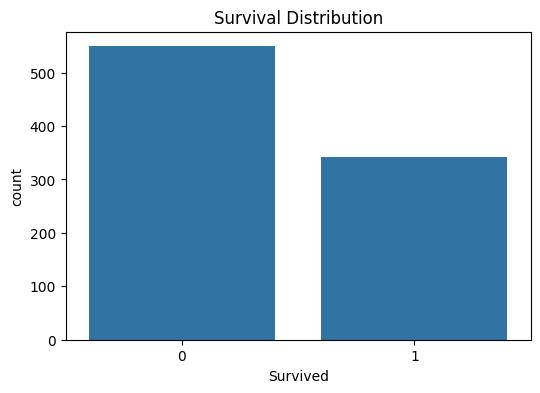

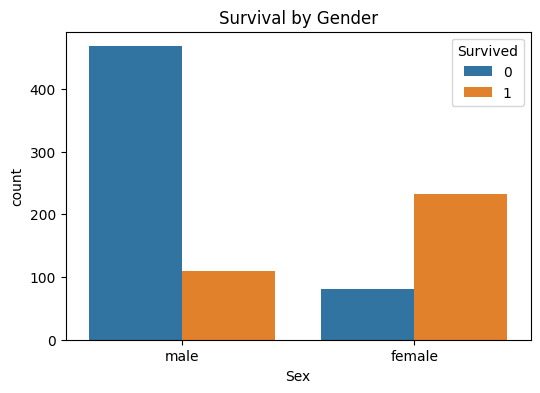

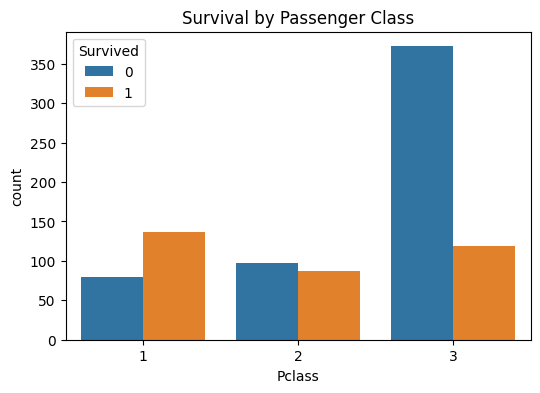

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=data)
plt.title("Survival Distribution")
plt.show()
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", hue="Survived", data=data)
plt.title("Survival by Gender")
plt.show()
plt.figure(figsize=(6,4))
sns.countplot(x="Pclass", hue="Survived", data=data)
plt.title("Survival by Passenger Class")
plt.show()


## Feature Selection
Based on domain understanding and EDA, the following features are selected:
- Passenger Class
- Gender
- Age
- Fare
- Embarkation Port


In [ ]:
features = ["Pclass", "Sex", "Age", "Fare", "Embarked"]
target = "Survived"
df = data[features + [target]]


## Data Cleaning
Missing values are handled to improve data quality:
- Age is filled using the median
- Embarked is filled using the mode


In [ ]:
df.loc[:, "Age"] = df["Age"].fillna(df["Age"].median())
df.loc[:, "Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])



In [ ]:
df = data[features + [target]].copy()
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
encoder = LabelEncoder()
df["Sex"] = encoder.fit_transform(df["Sex"])
df["Embarked"] = encoder.fit_transform(df["Embarked"])



## Train–Test Split
The dataset is split into training (75%) and testing (25%) sets to evaluate performance on unseen data.


In [ ]:
X = df.drop("Survived", axis=1)
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Data-Driven Prediction
A Logistic Regression model is used as a simple predictive tool to support the insights obtained from data analysis.
The focus remains on interpretation rather than model optimization.


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)


## Model Evaluation
Model performance is evaluated using accuracy, classification report, and confusion matrix.


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy * 100, 2), "%")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))




Accuracy: 78.48 %

Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       134
           1       0.73      0.73      0.73        89

    accuracy                           0.78       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.78      0.78      0.78       223



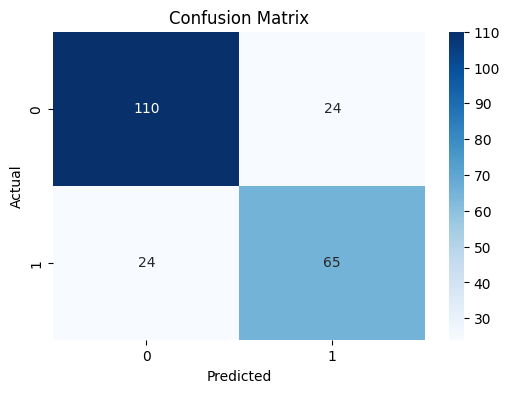

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()




## ROC Curve Analysis
The ROC Curve evaluates how well the model distinguishes between survived and non-survived passengers.


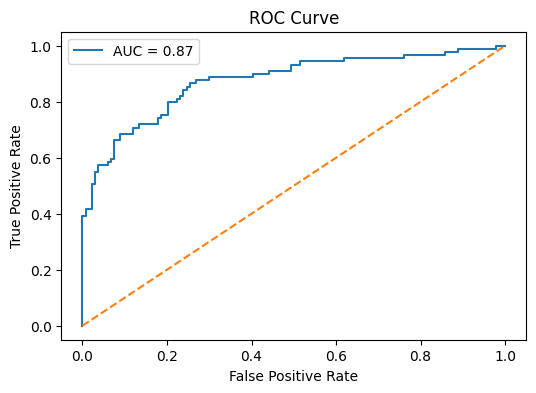

In [ ]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


## Conclusion
Exploratory data analysis revealed that gender, passenger class, and age significantly influenced survival.

The predictive analysis supports these insights and demonstrates the application of data science techniques such as data cleaning, visualization, and interpretation.
